# Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Data Description

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Loading Libraries

In [340]:
import pandas as pd #For Data Analysis
import numpy as np # For numerical Computations
import matplotlib.pyplot as plt # For Visualization
import seaborn as sns # For Visualization
import re # For Capturing words
plt.style.use('fivethirtyeight')

# Loading Datasets

In [341]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Data Information and data types

In [342]:
# Checking the Datatypes of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# EDA of training data

In [344]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [345]:
# Converting the column names to lower_case and replacing some headings
train_df.columns = [x.lower() for x in train_df.columns]
train_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [346]:
train_df.rename(columns={
            "passengerid":"passenger_id",
            "pclass":"passenger_class",
            "sibsp":"sibling_spouse",
            "parch":"parent_children"
        }, inplace=True)

In [347]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Finding missing values

In [348]:
train_df.isnull().sum()

passenger_id         0
survived             0
passenger_class      0
name                 0
sex                  0
age                177
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

<AxesSubplot:>

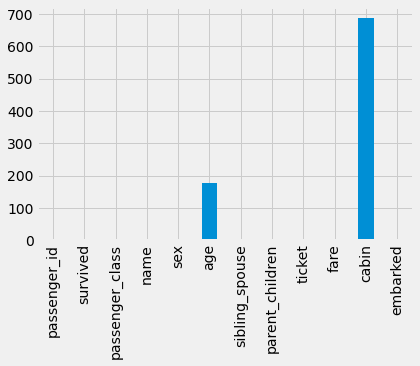

In [349]:
train_df.isnull().sum().plot(kind='bar')

<AxesSubplot:>

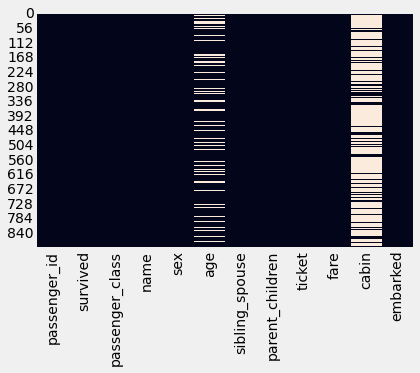

In [350]:
# Pictorial
sns.heatmap(train_df.isnull(), cbar=False)


It seems there is a some missing values in Age, Embarked. And a Lot of data values is missing in Cabin Column

### Missing Values: 
- [ ] Age
- [ ] Embarked
- [ ] Cabin


# Filling Missing values in Age Column

In [351]:
train_df.age.isnull().sum()

177

In [352]:
train_df.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

### Types of filling in the data:

1. Filling the missing data with the mean or median value if it’s a numerical variable.
2. Filling the missing data with mode if it’s a categorical value.
3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
4. Filling the categorical value with a new type for the missing values.

### Process for filling missing values in Age
1. Since its a continous values, we can use either mean or median - Here we can use <b>Median</b>
2. Since there are different categories in male and female as well by age category - like Mr, Master, Don
3. So we can group the individual category and fill the median value to the missing items


We can get the Mr, Master.... details from the name column

In [353]:
train_df.name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [354]:
# Now we can create a new column, called salutation and populate these data 
train_df["salutation"] = train_df.name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [355]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked,salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


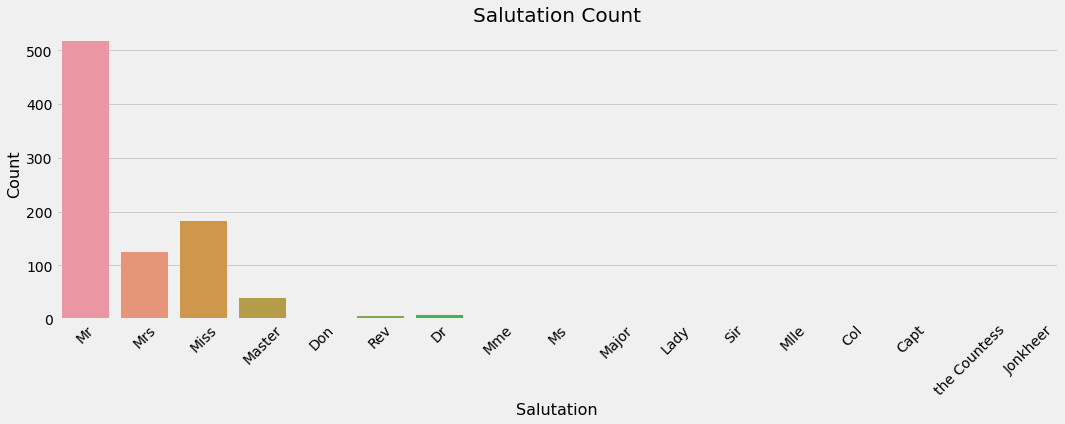

In [356]:
#plotting countplot for salutations
plt.figure(figsize=(16,5))
sns.countplot(x='salutation', data=train_df)
plt.xlabel("Salutation", fontsize=16) 
plt.ylabel("Count", fontsize=16)
plt.title("Salutation Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()


From the above graph, we can see that we have more categories in salutation, we can try to reduce it by mapping


In [357]:
# Creating Categories
salutation_dict = {
"Capt": "0",
"Col": "0",
"Major": "0",
"Dr": "0",
"Rev": "0",
"Jonkheer": "1",
"Don": "1",
"Sir" :  "1",
"the Countess":"1",
"Dona": "1",
"Lady" : "1",
"Mme": "2",
"Ms": "2",
"Mrs" : "2",
"Mlle":  "3",
"Miss" : "3",
"Mr" :   "4",
"Master": "5"
}

In [358]:
train_df['salutation'] = train_df.salutation.map(salutation_dict)

In [359]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked,salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [360]:
train_df.salutation = train_df.salutation.astype('float64')

<AxesSubplot:xlabel='salutation', ylabel='count'>

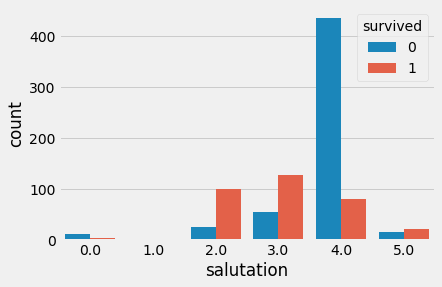

In [361]:
sns.countplot(x="salutation", data=train_df, hue='survived')

From the above graph its evident that people in category 2 , 3 and 5 were survived more than others.So we can create a new feature with this findings.


In [365]:
sal_sur = train_df[(train_df.salutation.isin([2.0, 3.0, 5.0]))].index

In [366]:
train_df["sal_sur"] = 0
train_df["sal_sur"][sal_sur] = 1

/tmp/ipykernel_5489/3626934243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["sal_sur"][sal_sur] = 1


In [367]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked,salutation,sal_sur
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,0


In [368]:
# Creating a Group based on Sex, Passenger, Salutation
age_group = train_df.groupby(["sex","passenger_class","salutation"])["age"]

In [369]:
# Median of each grop
age_group.median()

sex     passenger_class  salutation
female  1                0.0           49.0
                         1.0           40.5
                         2.0           40.0
                         3.0           30.0
        2                2.0           31.5
                         3.0           24.0
        3                2.0           31.0
                         3.0           18.0
male    1                0.0           51.0
                         1.0           40.0
                         4.0           40.0
                         5.0            4.0
        2                0.0           46.5
                         4.0           31.0
                         5.0            1.0
        3                4.0           26.0
                         5.0            4.0
Name: age, dtype: float64

In [370]:
age_group.transform('median')

0      26.0
1      40.0
2      18.0
3      40.0
4      26.0
       ... 
886    46.5
887    30.0
888    18.0
889    40.0
890    26.0
Name: age, Length: 891, dtype: float64

In [371]:
train_df.loc[train_df.age.isnull(), 'age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

In [372]:
# Applying the Dataframe with the median
train_df.loc[train_df.age.isnull(), 'age'] = age_group.transform('median')

In [373]:
train_df.age.isnull().sum()

0

## So now we have filled the missing values for Age

### Missing Values: 
- [X] Age
- [ ] Embarked
- [ ] Cabin


# Visualization of Age

In [374]:
train_df.age.value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

### Age by Counts

<AxesSubplot:>

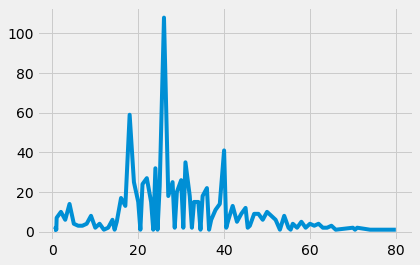

In [375]:

train_df.age.value_counts().sort_index().plot()

### Distribution of Age

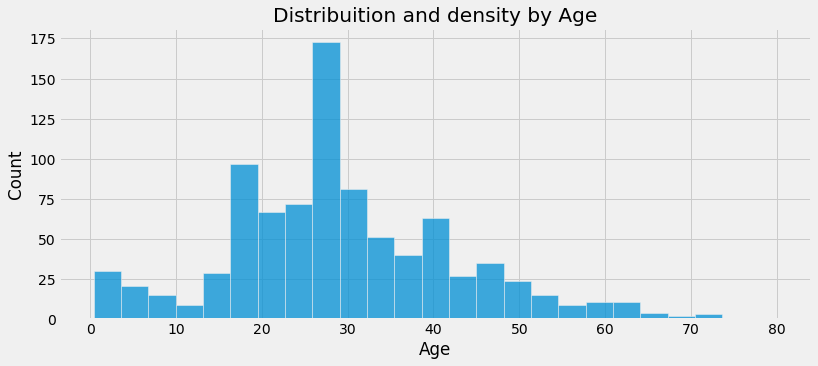

In [376]:
plt.figure(figsize=(12,5))
sns.histplot(x='age', data=train_df)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


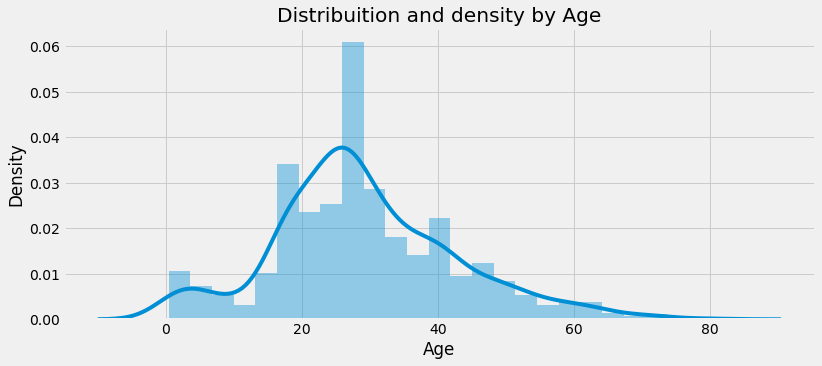

In [377]:
plt.figure(figsize=(12,5))
sns.distplot(x=train_df.age, bins=25)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

### Comparison with survived

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x360 with 0 Axes>

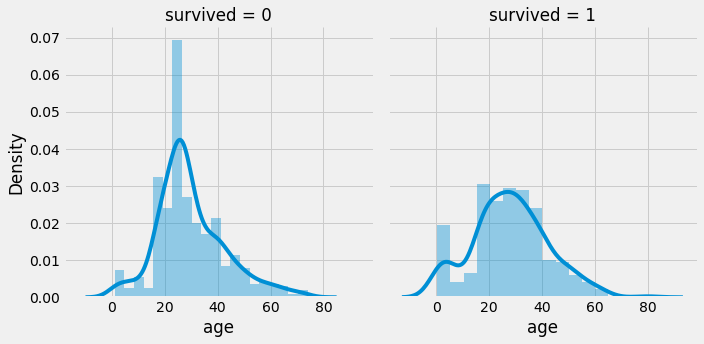

In [378]:
plt.figure(figsize=(12,5))
g = sns.FacetGrid(train_df, col='survived',size=5)
g = g.map(sns.distplot, "age")
plt.show()

* From the above graph, we are able to know that people of age between 18 to 40, are having higher rates of surviving

In [379]:
age_survived = train_df[train_df.survived == 1].age.value_counts().sort_index()
age_not_survived = train_df[train_df.survived == 0].age.value_counts().sort_index()

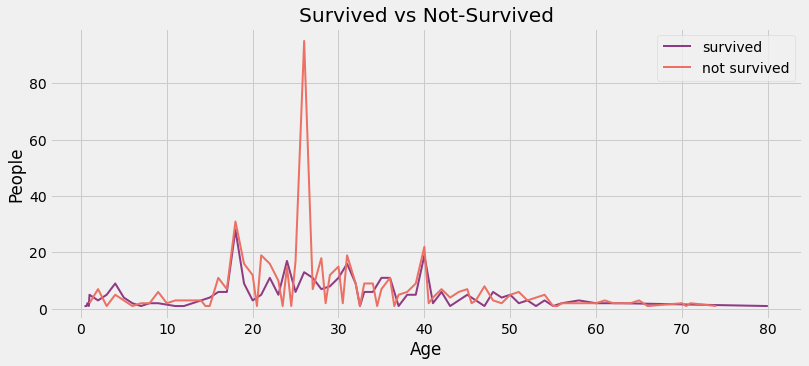

In [380]:
plt.figure(figsize=(12,5))
plt.plot(age_survived.index, age_survived.values, color='#8f3a84', linestyle='solid', label="survived", linewidth=2)
plt.plot(age_not_survived.index, age_not_survived.values, color='#EC7063', linestyle='solid', label="not survived", linewidth=2)
plt.xlabel("Age")
plt.ylabel("People")
plt.legend()
plt.title("Survived vs Not-Survived")
plt.show()

We can create a new column, age_category, so that we can use the feature that people with age between 18 to 40 to a class

In [381]:
interval = (0, 15, 43, 150) 
cats = [0, 1, 2]

# Applying the pd.cut and using the parameters that we created 
train_df["age_catg"] = pd.cut(train_df.age, interval, labels=cats)

# Printing the new Category
train_df["age_catg"].head()

0    1
1    1
2    1
3    1
4    1
Name: age_catg, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [382]:
train_df[['age','age_catg']].head()

,age,age_catg
0,22.0,1
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,1


# Filling Missing values in Embarked Column


In [383]:
train_df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

### PIE Chart Distribution

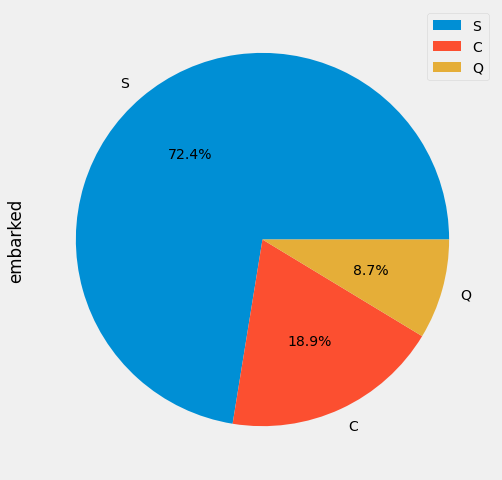

In [384]:
train_df.embarked.value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

### Distribution Plot 

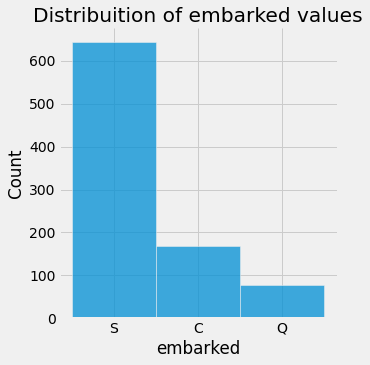

In [385]:
sns.displot(x=train_df.embarked)
plt.title("Distribuition of embarked values")
plt.show()

### Since the embarked is a categorical values, we can apply mode. So here we will be filling 'S' for all nan

In [386]:
train_df.embarked.fillna("S", inplace=True)

### Survival rate based on each embarkment

<AxesSubplot:xlabel='embarked', ylabel='survived'>

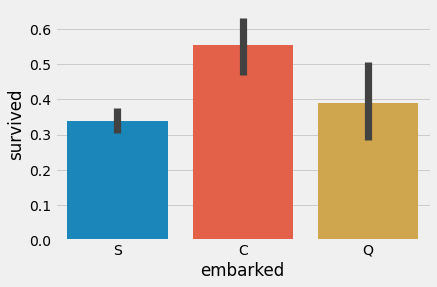

In [387]:
sns.barplot(x='embarked', y='survived', data=train_df)

from the above graph we can know that, people who are boarded in C were survived more

### Missing Values: 
- [X] Age
- [X] Embarked
- [ ] Cabin


# Filling Missing values in Cabin Column


In [388]:
train_df.cabin.isnull().sum()

687

In [389]:
train_df.cabin.shape

(891,)

We have more than 77% of data is missing, So we can ignore it. Or Else we can create a new column "is_cabin_present"

In [390]:
train_df["is_cabin_present"] = [1 if x == False else 0 for x in train_df.cabin.isnull()]

In [391]:
train_df[['is_cabin_present', 'survived']]

,is_cabin_present,survived
0,0,0
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [392]:
train_df[['is_cabin_present', 'survived']].corr()

,is_cabin_present,survived
is_cabin_present,1.000000,0.316912
survived,0.316912,1.000000


This is having a good correlation, so we can have it to our data aswell

### Missing Values: 
- [X] Age
- [X] Embarked
- [X] Cabin


All Missing Values are rectified

# Data Visualization

### Frequency distribution of Sex

<AxesSubplot:ylabel='sex'>

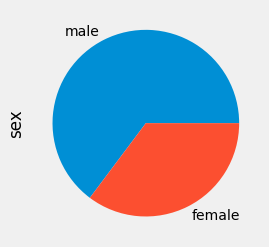

In [393]:
train_df.sex.value_counts().plot(kind='pie')

<AxesSubplot:>

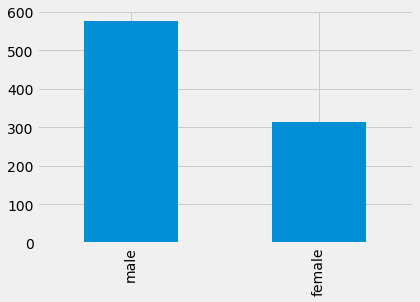

In [394]:
train_df.sex.value_counts().plot(kind='bar')

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex Distribution ')

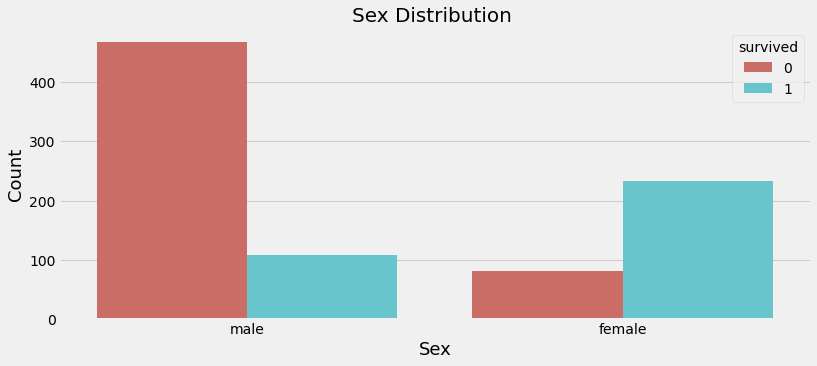

In [395]:
plt.figure(figsize=(12,5))
sns.countplot("sex", data=train_df, hue="survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Sex", fontsize=18)
plt.title("Sex Distribution ", fontsize=20)

In [396]:
train_df[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


#### From the above plot, we can get to know that females are more survived than males

In [397]:
train_df.columns

Index(['passenger_id', 'survived', 'passenger_class', 'name', 'sex', 'age',
       'sibling_spouse', 'parent_children', 'ticket', 'fare', 'cabin',
       'embarked', 'salutation', 'sal_sur', 'age_catg', 'is_cabin_present'],
      dtype='object')

### Frequency distribution of Passenger Class

<AxesSubplot:ylabel='passenger_class'>

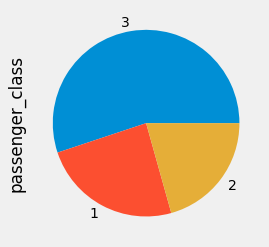

In [398]:
train_df.passenger_class.value_counts().plot(kind='pie')

<AxesSubplot:>

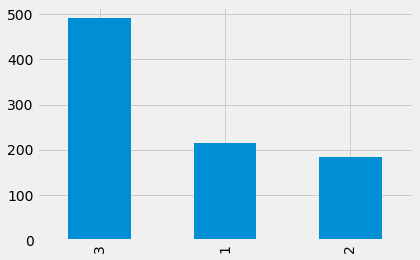

In [399]:
train_df.passenger_class.value_counts().plot(kind='bar')

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'P Class Distribution ')

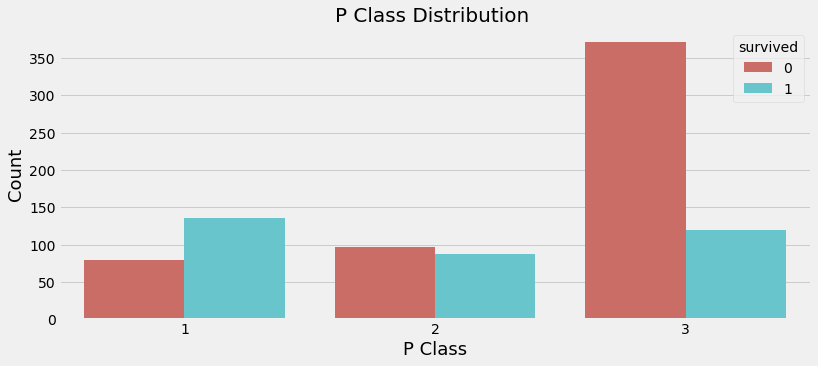

In [400]:
plt.figure(figsize=(12,5))
sns.countplot("passenger_class", data=train_df, hue="survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("P Class", fontsize=18)
plt.title("P Class Distribution ", fontsize=20)

In [401]:
train_df[['passenger_class', 'survived']].groupby(['passenger_class'], as_index=False).mean().sort_values(by='survived', ascending=False)

,passenger_class,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### From the above plot, we are able to identify that people in class 3, 2 are survived more than people in class 1

### Frequency Distribution of sibling_spouse and parent_children

In [402]:
train_df[['sibling_spouse', 'parent_children', 'survived']]

,sibling_spouse,parent_children,survived
0,1,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,1
888,1,2,0
889,0,0,1


In [403]:
train_df[['sibling_spouse', 'parent_children', 'survived']].corr()

,sibling_spouse,parent_children,survived
sibling_spouse,1.000000,0.414838,-0.035322
parent_children,0.414838,1.000000,0.081629
survived,-0.035322,0.081629,1.000000


from the above correlation, we can know that parent_children and sibling_spouse is having high correlation. We can try to create a new column, like whether the person came alone or accompanied by someone

In [404]:
# Checking values of sibling_spouse - to confirm the domain of the values.
train_df.sibling_spouse.unique()


array([1, 0, 3, 4, 2, 5, 8])

In [405]:
# Checking values of parent_children - to confirm the domain of the values.
train_df.parent_children.unique()


array([0, 1, 2, 5, 3, 4, 6])

In [406]:
train_df[(train_df.sibling_spouse == 0) & (train_df.parent_children == 0)].index

Int64Index([  2,   4,   5,   6,  11,  12,  14,  15,  17,  19,
            ...
            877, 878, 881, 882, 883, 884, 886, 887, 889, 890],
           dtype='int64', length=537)

In [407]:
alone_index = train_df[(train_df.sibling_spouse == 0) & (train_df.parent_children == 0)].index

In [450]:
train_df["alone"] = 0
train_df.loc[alone_index, "alone"] = 1

In [451]:
train_df[['alone','survived']].corr()

,alone,survived
alone,1.000000,0.045494
survived,0.045494,1.000000


from the above correlation, alone is having a good corelation with survival rate

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alone Distribution ')

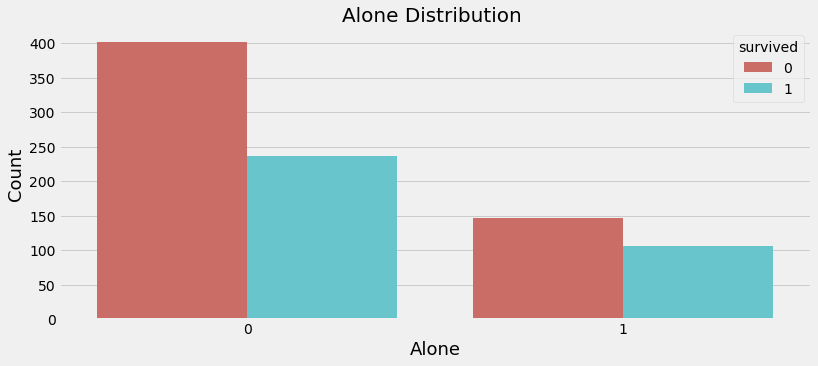

In [452]:
plt.figure(figsize=(12,5))
sns.countplot("alone", data=train_df, hue="survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Alone", fontsize=18)
plt.title("Alone Distribution ", fontsize=20)

# Correlation of all features

In [411]:
train_df.columns

Index(['passenger_id', 'survived', 'passenger_class', 'name', 'sex', 'age',
       'sibling_spouse', 'parent_children', 'ticket', 'fare', 'cabin',
       'embarked', 'salutation', 'sal_sur', 'age_catg', 'is_cabin_present',
       'alone'],
      dtype='object')

In [412]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [413]:
train_df.embarked = encoder.fit_transform(train_df.embarked)
train_df.salutation = encoder.fit_transform(train_df.salutation)
train_df.age_catg = encoder.fit_transform(train_df.age_catg)
train_df.sex = encoder.fit_transform(train_df.sex)

In [414]:
train_df.loc[ train_df['fare'] <= 7.91, 'fare'] = 0
train_df.loc[(train_df['fare'] > 7.91) & (train_df['fare'] <= 14.454), 'fare'] = 1
train_df.loc[(train_df['fare'] > 14.454) & (train_df['fare'] <= 31), 'fare']   = 2
train_df.loc[ train_df['fare'] > 31, 'fare'] = 3
train_df['fare'] = train_df['fare'].astype('float64')

<AxesSubplot:xlabel='fare', ylabel='count'>

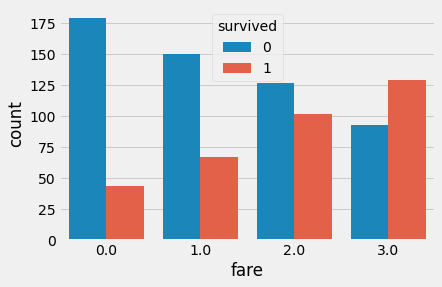

In [453]:
sns.countplot(x="fare", data=train_df, hue="survived")

In [415]:
train_df.fare.unique()

array([0., 3., 1., 2.])

In [416]:
def normalize(x):
    x = (x - min(x))/(max(x)-min(x))
    return x

train_df.age = normalize(train_df.age)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

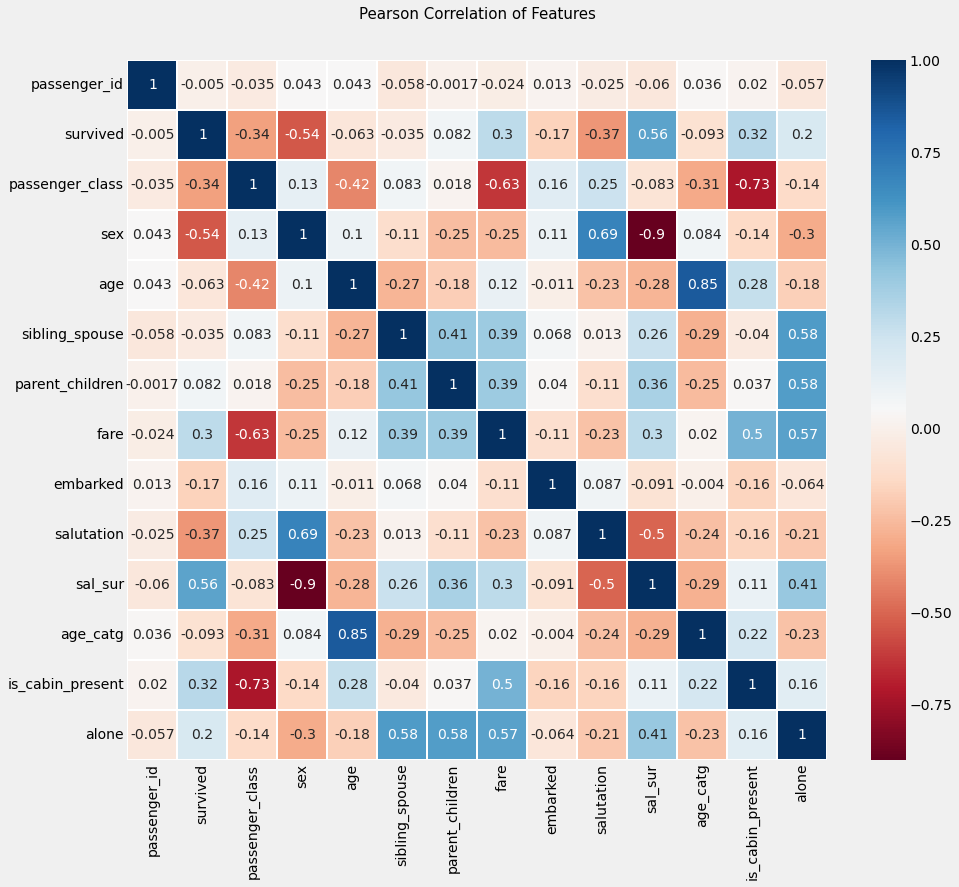

In [417]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From the above correlation graph, we can choose items with higher correlation
1. Alone
2. Is Cabin Present
3. sal sur
4. Fare


In [418]:
X = train_df[['alone','is_cabin_present','sal_sur','fare']]

In [419]:
Y = train_df["survived"]

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [425]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

# Model Building

In [426]:
#!pip install mlxtend

In [427]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

## 1.0 Logistic Regression

In [428]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
lr_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', lr_training_data_accuracy)
lr_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', lr_testing_data_accuracy)

Accuracy score of training data :  0.7752808988764045
Accuracy score of testing data :  0.8246268656716418


## 1.1 Logistic Regression with KFold

In [429]:
model = LogisticRegression()
kf = KFold(n_splits=5)
results_lr = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_lr.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_lr = np.mean(results_lr)
print("Total Average Accuracy of Linear Regression Classifier is : {0}".format(mean_result_lr)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.770949720670391 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       120
           1       0.61      0.85      0.71        59

    accuracy                           0.77       179
   macro avg       0.76      0.79      0.76       179
weighted avg       0.81      0.77      0.78       179

Confusion Matrix of KFold  1  is following:

[[88 32]
 [ 9 50]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.8033707865168539 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.77      0.80      0.78        79

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix of KFold  2  is following:

[[80 1

# 2.0 Random Forest Classifier

In [430]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
rf_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', rf_training_data_accuracy)
rf_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', rf_testing_data_accuracy)

Accuracy score of training data :  0.7752808988764045
Accuracy score of testing data :  0.8246268656716418


# 2.1 Random Forest Classifier with KFlod

In [431]:
model = RandomForestClassifier(max_depth=2, random_state=0)
kf = KFold(n_splits=5)
results_rf = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_rf.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_rf = np.mean(results_rf)
print("Total Average Accuracy of RandomForestClassifier is : {0}".format(mean_result_rf)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.7877094972067039 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       120
           1       0.64      0.81      0.72        59

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.81      0.79      0.79       179

Confusion Matrix of KFold  1  is following:

[[93 27]
 [11 48]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.8202247191011236 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.80      0.80      0.80        79

    accuracy                           0.82       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.82      0.82      0.82       178

Confusion Matrix of KFold  2  is following:

[[83 

# 3.0 Naive Bayes Algorithm

In [432]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
nb_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', nb_training_data_accuracy)
nb_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', nb_testing_data_accuracy)

Accuracy score of training data :  0.7335473515248796
Accuracy score of testing data :  0.8059701492537313


# 3.1 Naive Bayes with KFold

In [433]:
model = GaussianNB()
kf = KFold(n_splits=5)
results_nb = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_nb.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_nb = np.mean(results_nb)
print("Total Average Accuracy of GaussianNB is : {0}".format(mean_result_nb)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.6815642458100558 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       120
           1       0.51      0.71      0.60        59

    accuracy                           0.68       179
   macro avg       0.67      0.69      0.67       179
weighted avg       0.72      0.68      0.69       179

Confusion Matrix of KFold  1  is following:

[[80 40]
 [17 42]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.7528089887640449 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.72      0.72      0.72        79

    accuracy                           0.75       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.75      0.75      0.75       178

Confusion Matrix of KFold  2  is following:

[[77 

# 4.0 KNN Algorithm

In [434]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
knn_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', knn_training_data_accuracy)
knn_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', knn_testing_data_accuracy)

Accuracy score of training data :  0.7255216693418941
Accuracy score of testing data :  0.7686567164179104


/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 4.1 KNN Algorithm with KFold

In [435]:
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
kf = KFold(n_splits=5)
results_knn = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_knn.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_knn = np.mean(results_knn)
print("Total Average Accuracy of KNN Algorithm  is : {0}".format(mean_result_knn)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.770949720670391 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       120
           1       0.67      0.61      0.64        59

    accuracy                           0.77       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.77      0.77      0.77       179

Confusion Matrix of KFold  1  is following:

[[102  18]
 [ 23  36]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.7247191011235955 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        99
           1       0.86      0.46      0.60        79

    accuracy                           0.72       178
   macro avg       0.77      0.70      0.69       178
weighted avg       0.76      0.72      0.70       178

Confusion Matrix of KFold  2  is following:

[[

/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 5.0 SGD Algorithm

In [436]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-3))

model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
sgd_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', sgd_training_data_accuracy)
sgd_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', sgd_testing_data_accuracy)

Accuracy score of training data :  0.7752808988764045
Accuracy score of testing data :  0.8246268656716418


# 5.1 SGD Algorithm with KFold

In [437]:
model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-3))
kf = KFold(n_splits=5)
results_sgd = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_sgd.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_sgd = np.mean(results_sgd)
print("Total Average Accuracy of SGD Algorithm  is : {0}".format(mean_result_sgd)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.7877094972067039 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       120
           1       0.64      0.81      0.72        59

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.81      0.79      0.79       179

Confusion Matrix of KFold  1  is following:

[[93 27]
 [11 48]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.6741573033707865 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.64      0.94      0.76        99
           1       0.82      0.34      0.48        79

    accuracy                           0.67       178
   macro avg       0.73      0.64      0.62       178
weighted avg       0.72      0.67      0.64       178

Confusion Matrix of KFold  2  is following:

[[93 

# 6.0 Decision Tree Classifier

In [438]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
sgd_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', sgd_training_data_accuracy)
sgd_testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', sgd_testing_data_accuracy)

Accuracy score of training data :  0.8105939004815409
Accuracy score of testing data :  0.7835820895522388


# 6.1 Decision Tree with KFold

In [439]:
model = DecisionTreeClassifier(random_state=10)
kf = KFold(n_splits=5)
results_dt = []
fold = 0
i=0
conf_matrix_lists = []
for train_index, test_index in kf.split(X,Y):
    i=i+1
    print("KFold Split:",i,'\n')
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    results_dt.append(accuracy)
    print("Accuracy of KFold ",i, "is: ",accuracy, '\n')
    print("Classification Report of KFold ",i," is following:", '\n')
    print(classification_report(ytest, predictions))
    print("Confusion Matrix of KFold ",i," is following:\n")
    _conf_mat=confusion_matrix(ytest, predictions)
    conf_matrix_lists.append(_conf_mat)
    print(_conf_mat)
    print('\n')

print('\n')
print('Average Confusion Matrix')
_mean_of_conf_mat = np.mean(conf_matrix_lists, axis=0)

_mean_of_conf_mat = np.ceil(_mean_of_conf_mat)

conf_df=pd.DataFrame(_mean_of_conf_mat)
labels =['Not Survived','Survived']
print(conf_df)

mean_result_dt = np.mean(results_dt)
print("Total Average Accuracy of Decision Tree Algorithm  is : {0}".format(mean_result_dt)) 

KFold Split: 1 

Accuracy of KFold  1 is:  0.770949720670391 

Classification Report of KFold  1  is following: 

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       120
           1       0.62      0.80      0.70        59

    accuracy                           0.77       179
   macro avg       0.75      0.78      0.76       179
weighted avg       0.80      0.77      0.78       179

Confusion Matrix of KFold  1  is following:

[[91 29]
 [12 47]]


KFold Split: 2 

Accuracy of KFold  2 is:  0.797752808988764 

Classification Report of KFold  2  is following: 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.77      0.77      0.77        79

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix of KFold  2  is following:

[[81 18

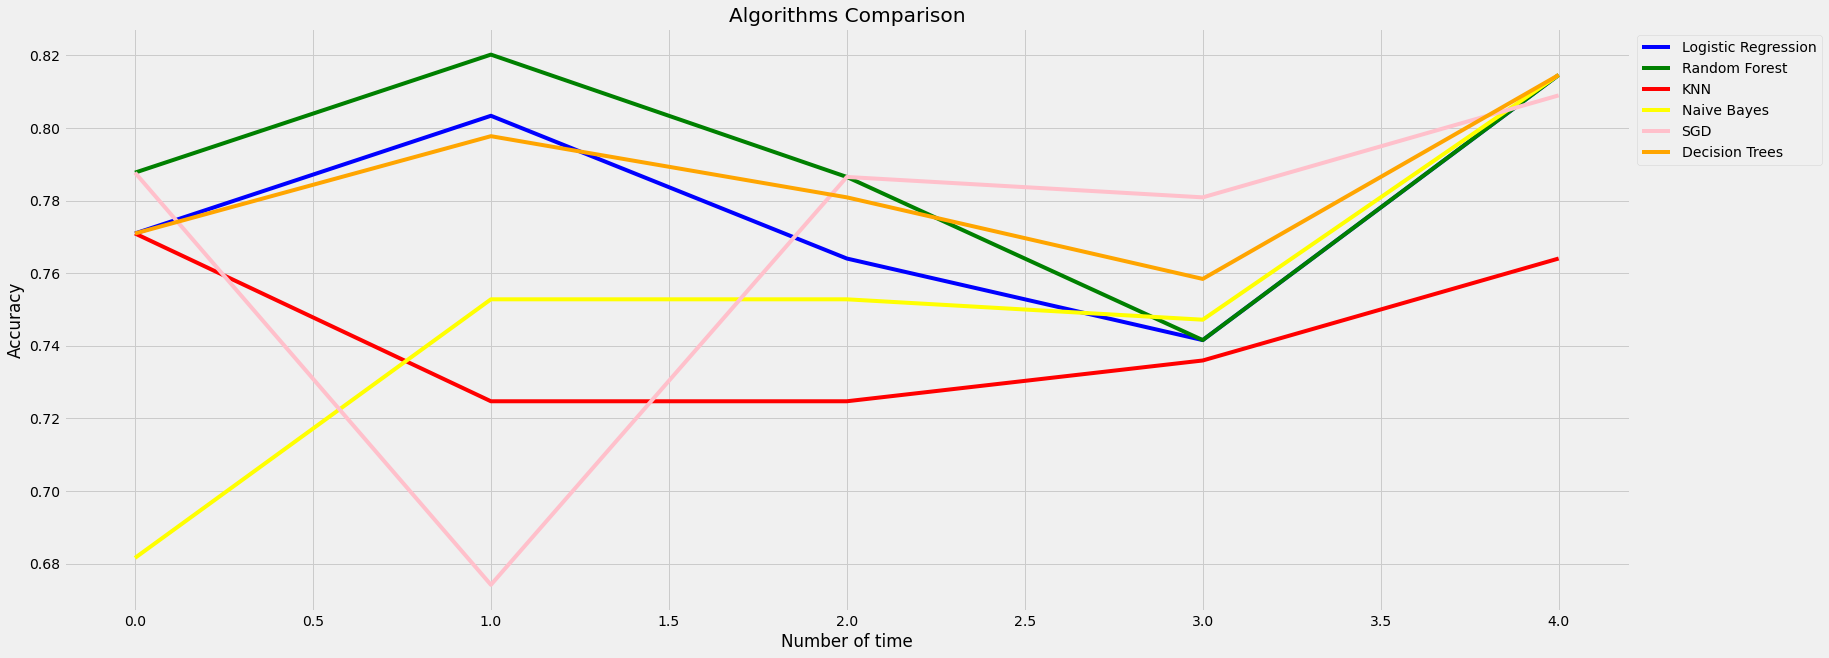

In [440]:
plot_df = pd.DataFrame()
plot_df['lr']=results_lr
plot_df['rf']=results_rf
plot_df['knn']=results_knn
plot_df['nb']=results_nb
plot_df['sgd']=results_sgd
plot_df['dt']=results_dt

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)

plt.plot(plot_df.lr.values,color='blue',label='Logistic Regression')
plt.plot(plot_df.rf.values,color='green',label='Random Forest')
plt.plot(plot_df.knn.values,color='red',label='KNN')
plt.plot(plot_df.nb.values,color='yellow',label='Naive Bayes')
plt.plot(plot_df.sgd.values,color='pink',label='SGD')
plt.plot(plot_df.dt.values,color='orange',label='Decision Trees')

plt.title('Algorithms Comparison')
plt.xlabel('Number of time')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot:>

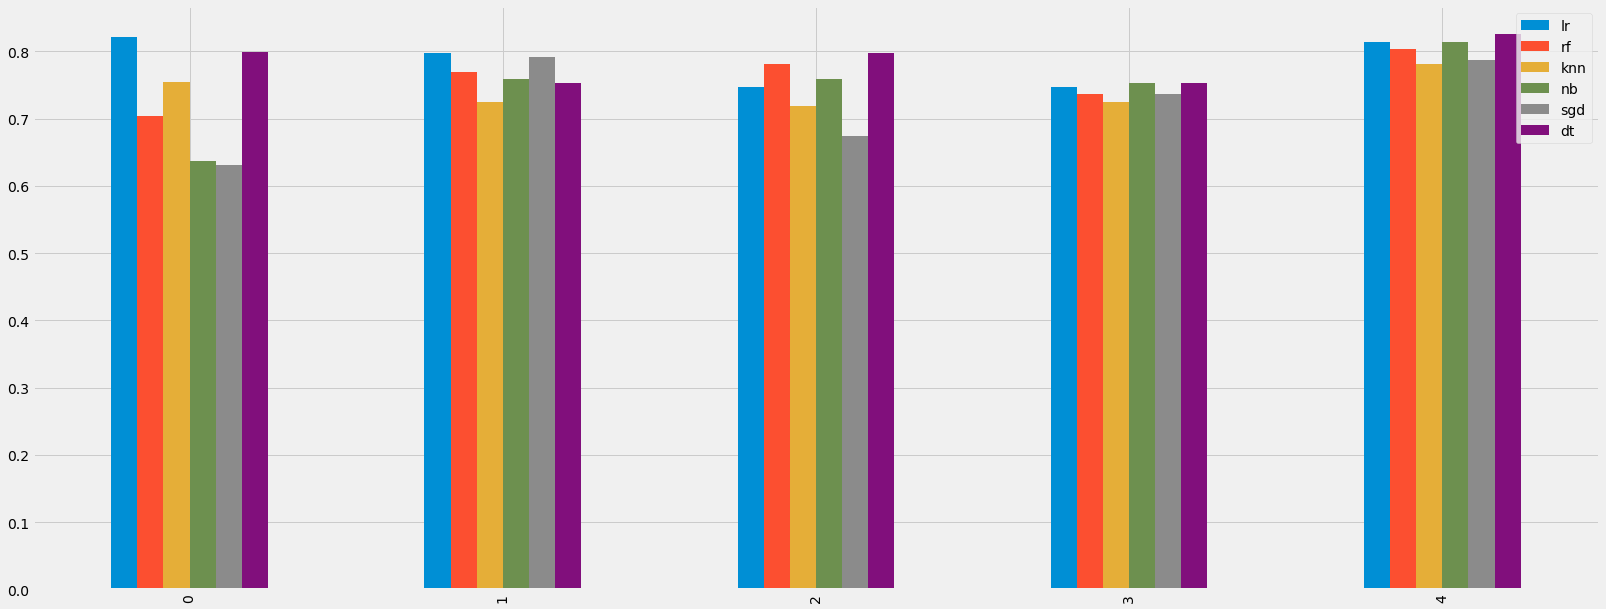

In [274]:
plot_df.plot(kind='bar',figsize=(25, 10))

# Model Inference

From the analysis of above models, Decision Tree is performing good for our data. So we can consider it as a final model

In [276]:
from sklearn.tree import DecisionTreeClassifier
final_model = DecisionTreeClassifier(random_state=10)
final_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

# Preparing the Test Dataset

In [442]:
test_df = pd.read_csv('../data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [443]:
test_df.columns = [x.lower() for x in test_df.columns]
test_df.rename(columns={
            "passengerid":"passenger_id",
            "pclass":"passenger_class",
            "sibsp":"sibling_spouse",
            "parch":"parent_children"
        }, inplace=True)
test_df["salutation"] = test_df.name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
test_df['salutation'] = test_df.salutation.map(salutation_dict)
test_df.salutation = test_df.salutation.astype('float64')
sal_sur = test_df[(test_df.salutation.isin([2.0, 3.0, 5.0]))].index
test_df["sal_sur"] = 0
test_df["sal_sur"][sal_sur] = 1
age_group = test_df.groupby(["sex","passenger_class","salutation"])["age"]
test_df.loc[test_df.age.isnull(), 'age'] = age_group.transform('median')
interval = (0, 15, 43, 150) 
cats = [0, 1, 2]
# Applying the pd.cut and using the parameters that we created 
test_df["age_catg"] = pd.cut(test_df.age, interval, labels=cats)
# Printing the new Category
test_df["age_catg"].head()
test_df.embarked.fillna("S", inplace=True)
test_df["is_cabin_present"] = [1 if x == False else 0 for x in test_df.cabin.isnull()]
alone_index = test_df[(test_df.sibling_spouse == 0) & (test_df.parent_children == 0)].index
test_df["alone"] = 1
test_df.loc[alone_index, "alone"] = 0
test_df.embarked = encoder.fit_transform(test_df.embarked)
test_df.salutation = encoder.fit_transform(test_df.salutation)
test_df.age_catg = encoder.fit_transform(test_df.age_catg)
test_df.sex = encoder.fit_transform(test_df.sex)
test_df.loc[ test_df['fare'] <= 7.91, 'fare'] = 0
test_df.loc[(test_df['fare'] > 7.91) & (test_df['fare'] <= 14.454), 'fare'] = 1
test_df.loc[(test_df['fare'] > 14.454) & (test_df['fare'] <= 31), 'fare']   = 2
test_df.loc[ test_df['fare'] > 31, 'fare'] = 3
test_df['fare'] = test_df['fare'].astype('float64')
test_df.fare.fillna(test_df.fare.mean(), inplace=True) # Newly added, Since fare in test data is null
Test_X = test_df[['alone','is_cabin_present','sal_sur','fare']]

/tmp/ipykernel_5489/598819057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["sal_sur"][sal_sur] = 1


In [444]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)

In [445]:
Test_X_prediction = model.predict(Test_X)
sub_df = pd.read_csv("../data/gender_submission.csv")
sub_df["Survived"] = Test_X_prediction
sub_df.to_csv("final_submission.csv", index=False)